# Exploratory Data Analysis

This notebook explores the field campaign data of farm plots in KAZA, collected from 2017 to 2020. Points were collected in the field and respective polygons were drawn using Google Earth. Polygons were only drawn for points that are visible in Google Earth in 2022. The notebook mostly analyzes the polygons. A comparison of the point and polygon data can be found at the end of the notebook.

## Setup

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium

In [2]:
pd.set_option('display.max_columns', 500)

In [3]:
%matplotlib inline

## Load and explore polygons

In [4]:
farm_plots = gpd.read_file('../data/farm_plots_fixed/Sioma_complex_farms_2017_20_fixed.shp')

In [5]:
farm_plots.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [6]:
farm_plots.shape

(1153, 51)

In [7]:
farm_plots.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1153 entries, 0 to 1152
Data columns (total 51 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    1153 non-null   int64   
 1   Join_Count  1153 non-null   int64   
 2   TARGET_FID  1153 non-null   int64   
 3   OBJECTID_1  1153 non-null   float64 
 4   globalid    343 non-null    object  
 5   Date        343 non-null    object  
 6   Farmers_na  1045 non-null   object  
 7   Village_na  1107 non-null   object  
 8   Community_  888 non-null    object  
 9   Gender_typ  328 non-null    object  
 10  Head_of_ho  329 non-null    object  
 11  Profits_fr  320 non-null    object  
 12  Non_Agricu  256 non-null    object  
 13  Profits_No  286 non-null    object  
 14  Fellumbus   331 non-null    object  
 15  Fellumbus_  118 non-null    object  
 16  Fellumbus1  1153 non-null   float64 
 17  Post_Harve  318 non-null    object  
 18  Post_Har_1  1153 non-null   float64 
 19

In [8]:
farm_plots.head()

,OBJECTID,Join_Count,TARGET_FID,OBJECTID_1,globalid,Date,Farmers_na,Village_na,Community_,Gender_typ,Head_of_ho,Profits_fr,Non_Agricu,Profits_No,Fellumbus,Fellumbus_,Fellumbus1,Post_Harve,Post_Har_1,Post_Har_2,Coorparati,Training,Type_of_Tr,Number_of_,Training_o,HWC,HWC_loss,Loss_Harve,Loss_Units,Species,Data_colle,CreationDa,EditDate,ObjectID_2,GlobalID_1,Crop_Type,Size_of_fi,Method,Conservati,Total_Harv,Units,Intial_inv,ParentGlob,Creation_1,EditDate_1,x,y,Year,Shape_Leng,Shape_Area,geometry
0,1,1,1,0.0,None,None,None,Mate,None,None,None,None,None,None,None,None,0.0,None,0.0,None,None,None,None,0.0,None,None,None,0.0,None,None,None,None,None,1.0,None,Maize,None,Conservation Agriculture,None,3.0,bags,None,None,None,None,23.369345,-17.649308,2017.0,0.000506,1.535485e-08,"POLYGON Z ((23.36928 -17.64918 0.00000, 23.369..."
1,2,1,2,0.0,None,None,None,Chivula,None,None,None,None,None,None,None,None,0.0,None,0.0,None,None,None,None,0.0,None,None,None,0.0,None,None,None,None,None,2.0,None,Maize,None,Conservation Agriculture,None,4.0,bags,None,None,None,None,23.369696,-17.648855,2017.0,0.000656,2.659136e-08,"POLYGON Z ((23.36949 -17.64874 0.00000, 23.369..."
2,3,1,3,0.0,None,None,None,Mbala,None,None,None,None,None,None,None,None,0.0,None,0.0,None,None,None,None,0.0,None,None,None,0.0,None,None,None,None,None,3.0,None,Maize,None,Conservation Agriculture,None,4.0,bags,None,None,None,None,23.428358,-17.619148,2017.0,0.008660,3.750012e-06,"POLYGON Z ((23.42761 -17.61737 0.00000, 23.428..."
3,4,1,4,0.0,None,None,None,Kachanchi,None,None,None,None,None,None,None,None,0.0,None,0.0,None,None,None,None,0.0,None,None,None,0.0,None,None,None,None,None,4.0,None,Maize,None,Conservation Agriculture,None,4.0,bags,None,None,None,None,23.412410,-17.595901,2017.0,0.004561,9.504647e-07,"POLYGON Z ((23.41208 -17.59547 0.00000, 23.412..."
4,5,1,5,0.0,None,None,None,Kachanchi,None,None,None,None,None,None,None,None,0.0,None,0.0,None,None,None,None,0.0,None,None,None,0.0,None,None,None,None,None,5.0,None,Maize,None,Conservation Agriculture,None,5.0,bags,None,None,None,None,23.411034,-17.593672,2017.0,0.003678,5.153094e-07,"POLYGON Z ((23.41085 -17.59339 0.00000, 23.411..."


<AxesSubplot:>

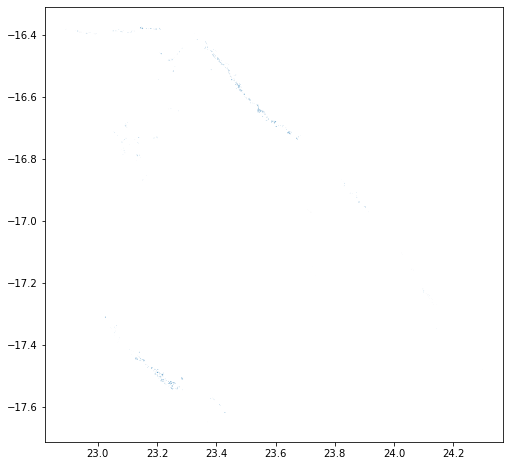

In [9]:
farm_plots.plot(figsize=(12,8))

## Explore features

In [10]:
def plot_frequencies(df, feature):
    df[feature].fillna('unknown').value_counts().plot.bar(title='Feature: {}'.format(feature))
    plt.ylabel('Number of observations')

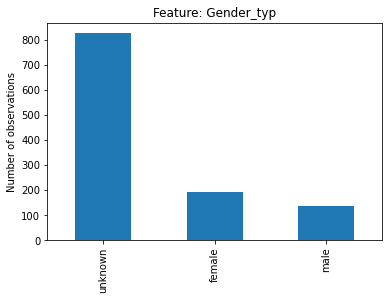

In [11]:
plot_frequencies(farm_plots, 'Gender_typ')

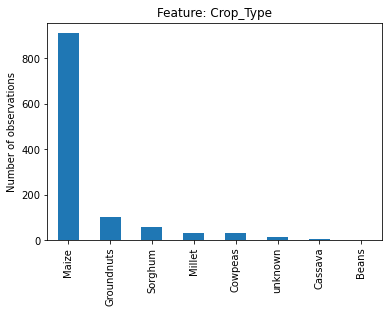

In [12]:
plot_frequencies(farm_plots, 'Crop_Type')

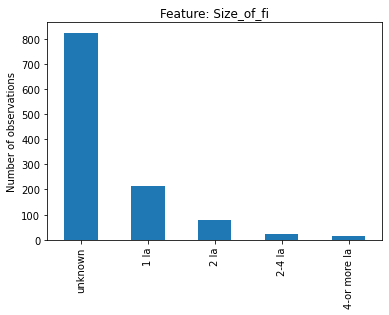

In [13]:
plot_frequencies(farm_plots, 'Size_of_fi')

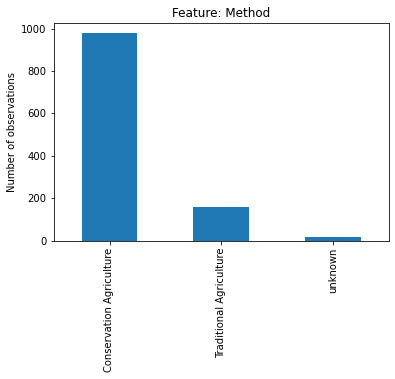

In [14]:
plot_frequencies(farm_plots, 'Method')

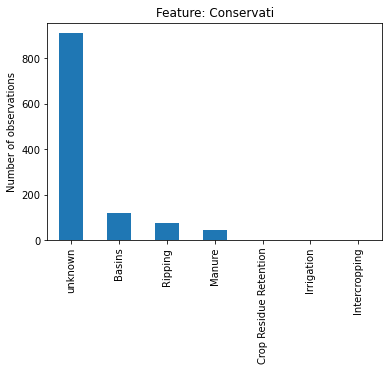

In [15]:
plot_frequencies(farm_plots, 'Conservati')

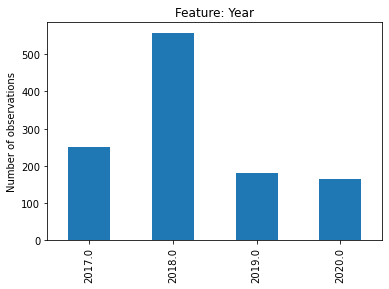

In [16]:
farm_plots['Year'].fillna('unknown').value_counts().sort_index().plot.bar(title='Feature: {}'.format('Year'))
plt.ylabel('Number of observations')
plt.show()

### Explore dates

In [17]:
farm_plots['Date'].fillna('unknown').value_counts().head()

unknown       810
2019-11-23     25
2019-10-12     22
2019-10-21     18
2019-10-15     18
Name: Date, dtype: int64

In [18]:
farm_plots['CreationDa'].fillna('unknown').value_counts().head()

unknown       810
2020-01-07    136
2019-11-29     82
2019-12-18     53
2019-11-25     26
Name: CreationDa, dtype: int64

In [19]:
farm_plots['EditDate'].fillna('unknown').value_counts().head()

unknown       810
2020-01-07    136
2019-11-29     82
2019-12-18     53
2019-11-25     26
Name: EditDate, dtype: int64

In [20]:
farm_plots['Creation_1'].fillna('unknown').value_counts().head()

unknown                 810
1/7/2020 11:05:47 AM      1
1/7/2020 12:08:58 PM      1
1/7/2020 12:14:16 PM      1
1/7/2020 11:04:34 AM      1
Name: Creation_1, dtype: int64

In [21]:
farm_plots['EditDate_1'].fillna('unknown').value_counts().head()

unknown                 810
1/7/2020 11:05:47 AM      1
1/7/2020 12:08:58 PM      1
1/7/2020 12:14:16 PM      1
1/7/2020 11:04:34 AM      1
Name: EditDate_1, dtype: int64

**It seems as if the only reliable date information is contained in the column 'Year' since all other columns that are supposed to contain dates seem to contain no or not complete date information.**

## Map farm plots

In [22]:
farm_plots_2017 = farm_plots[farm_plots['Year'] == 2017].reset_index(drop=True)
farm_plots_2018 = farm_plots[farm_plots['Year'] == 2018].reset_index(drop=True)
farm_plots_2019 = farm_plots[farm_plots['Year'] == 2019].reset_index(drop=True)
farm_plots_2020 = farm_plots[farm_plots['Year'] == 2020].reset_index(drop=True)

In [23]:
locations_2017 = farm_plots_2017[['y', 'x']]
locations_list_2017 = locations_2017.values.tolist()

locations_2018 = farm_plots_2018[['y', 'x']]
locations_list_2018 = locations_2018.values.tolist()

locations_2019 = farm_plots_2019[['y', 'x']]
locations_list_2019 = locations_2019.values.tolist()

locations_2020 = farm_plots_2020[['y', 'x']]
locations_list_2020 = locations_2020.values.tolist()

In [24]:
%%time

map = folium.Map(location=[-17.0, 23.4], zoom_start=9)

title = 'Farm Plot Locations in the Kavango-Zambezi Transfrontier Conservation Area'

title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             <p align="center"> <font color="green">Green=</font>2017; <font color="red">Red=</font>2018; <font color="blue">Blue=</font>2019; <font color="orange">Orange=</font>2020 </p>
             '''.format(title)

map.get_root().html.add_child(folium.Element(title_html))

for point in range(0, len(locations_list_2017)):
    folium.Circle(locations_list_2017[point], color='green', radius=5, label='test').add_to(map)

for point in range(0, len(locations_list_2018)):
    folium.Circle(locations_list_2018[point], color='red', radius=5).add_to(map)

for point in range(0, len(locations_list_2019)):
    folium.Circle(locations_list_2019[point], color='blue', radius=5).add_to(map)

for point in range(0, len(locations_list_2020)):
    folium.Circle(locations_list_2020[point], color='orange', radius=5).add_to(map)

map

CPU times: user 67.5 ms, sys: 3.16 ms, total: 70.7 ms
Wall time: 100 ms


In [25]:
map.save('farm_plots_fixed_locations_by_year.html')

## Save years and polygons separately

In [26]:
farm_plots['Year'] = farm_plots['Year'].astype(int)

In [27]:
farm_plots = farm_plots.rename(columns={'Year': 'year'})

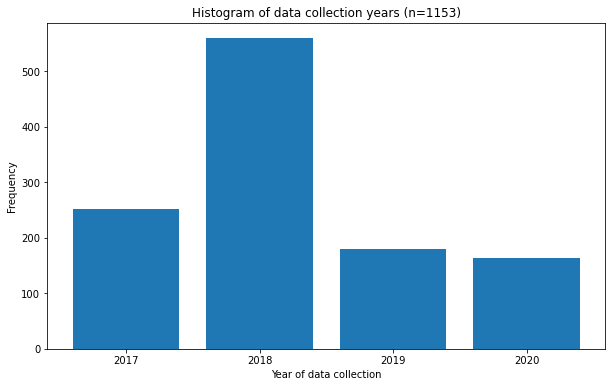

In [28]:
plt.figure(figsize=(10,6))
x = farm_plots['year'].unique()
h = farm_plots['year'].value_counts().sort_index()
plt.bar(x, h)
plt.title('Histogram of data collection years (n={})'.format(len(farm_plots)))
plt.xlabel('Year of data collection')
plt.xticks(farm_plots['year'].unique())
plt.ylabel('Frequency')
plt.savefig('visualizations/histogram_years.png')

In [29]:
farm_plots[['year', 'geometry']].to_file('data/farm_plots_fixed_locations.shp')

/home/alex/anaconda3/envs/farm_plots/lib/python3.8/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


## Calculate farm plot areas

In [30]:
# re-project to equal area projection
farm_plots_area = farm_plots['geometry'].to_crs({'proj':'cea'}) 

In [31]:
farm_plots_area.crs

<Derived Projected CRS: +proj=cea +type=crs>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unknown
- method: Lambert Cylindrical Equal Area
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [32]:
farm_plots_area

0       POLYGON Z ((2601456.887 -1921616.865 0.000, 26...
1       POLYGON Z ((2601480.219 -1921570.478 0.000, 26...
2       POLYGON Z ((2607949.384 -1918261.232 0.000, 26...
3       POLYGON Z ((2606221.232 -1915950.440 0.000, 26...
4       POLYGON Z ((2606084.431 -1915730.908 0.000, 26...
                              ...                        
1148    POLYGON Z ((2553604.512 -1788303.305 0.000, 25...
1149    POLYGON Z ((2553089.525 -1788121.200 0.000, 25...
1150    POLYGON Z ((2551962.207 -1787798.590 0.000, 25...
1151    POLYGON Z ((2548679.961 -1787352.065 0.000, 25...
1152    POLYGON Z ((2548282.466 -1787561.132 0.000, 25...
Name: geometry, Length: 1153, dtype: geometry

In [33]:
# area in square meters
farm_plots_area.area

0         180.329531
1         312.293294
2       44048.015717
3       11165.600270
4        6053.677427
            ...     
1148      297.227681
1149      418.428784
1150     1510.258479
1151      472.440424
1152     4520.676676
Length: 1153, dtype: float64

In [34]:
farm_plots_area.area.describe()

count      1153.000000
mean       7728.284173
std       10728.337710
min          86.052738
25%        1460.444956
50%        4089.450695
75%        9259.033113
max      108690.159172
dtype: float64

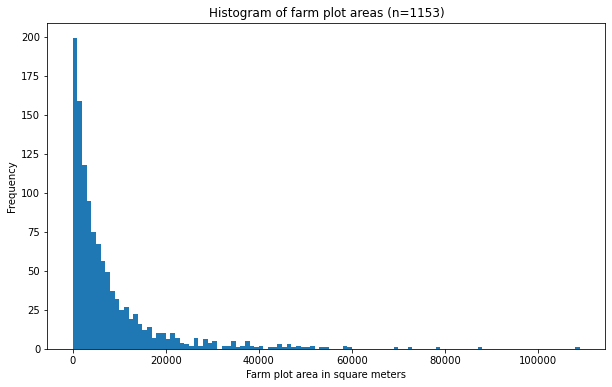

In [35]:
plt.figure(figsize=(10,6))
plt.hist(farm_plots_area.area, bins=range(0,110000,1000))
plt.title('Histogram of farm plot areas (n={})'.format(len(farm_plots_area)))
plt.xlabel('Farm plot area in square meters')
plt.ylabel('Frequency')
plt.savefig('visualizations/histogram_farm_plot_areas_square_meters.png')

In [36]:
farm_plots_area_hectare = list(farm_plots_area.area / 10**4)

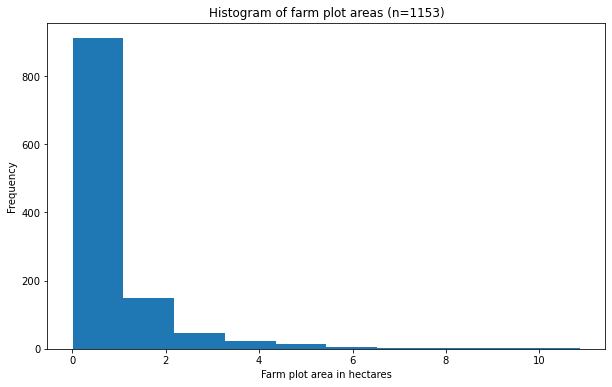

In [37]:
plt.figure(figsize=(10,6))
plt.hist(farm_plots_area_hectare)
plt.title('Histogram of farm plot areas (n={})'.format(len(farm_plots_area)))
plt.xlabel('Farm plot area in hectares')
plt.ylabel('Frequency')
plt.savefig('visualizations/histogram_farm_plot_areas_hectares.png')

In [38]:
farm_plots_area_acre = list(farm_plots_area.area / 4046.85642)

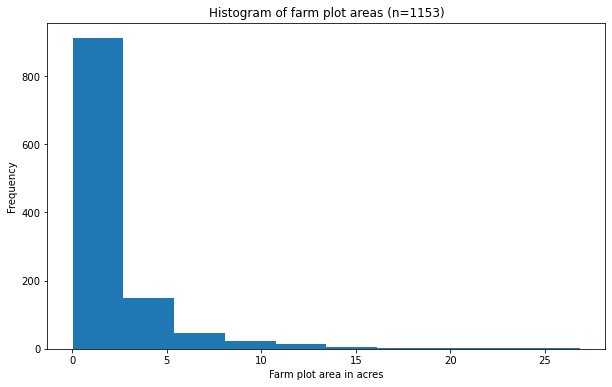

In [39]:
plt.figure(figsize=(10,6))
plt.hist(farm_plots_area_acre)
plt.title('Histogram of farm plot areas (n={})'.format(len(farm_plots_area)))
plt.xlabel('Farm plot area in acres')
plt.ylabel('Frequency')
plt.savefig('visualizations/histogram_farm_plot_areas_acres.png')

In [40]:
farm_plots_area_square_km = list(farm_plots_area.area / 10**6)
len(farm_plots_area_square_km)

1153

In [41]:
farm_plots_small = list(filter(lambda area: area < 0.025, farm_plots_area_square_km))
len(farm_plots_small)

1079

In [42]:
farm_plots_medium = list(filter(lambda area: (area >= 0.025) & (area < 0.1), farm_plots_area_square_km))
len(farm_plots_medium)

73

In [43]:
farm_plots_large = list(filter(lambda area: area > 0.1, farm_plots_area_square_km))
len(farm_plots_large)

1

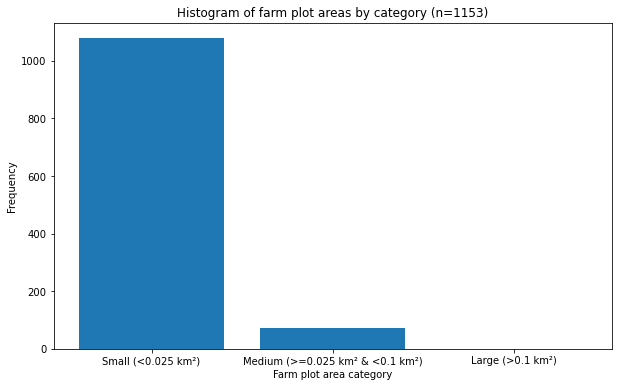

In [44]:
plt.figure(figsize=(10,6))
plt.bar(height=len(farm_plots_small), x='Small (<0.025 km²)', color='#1f77b4')
plt.bar(height=len(farm_plots_medium), x='Medium (>=0.025 km² & <0.1 km²)', color='#1f77b4')
plt.bar(height=len(farm_plots_large), x='Large (>0.1 km²)', color='#1f77b4')
plt.title('Histogram of farm plot areas by category (n={})'.format(len(farm_plots_area)))
plt.xlabel('Farm plot area category')
plt.ylabel('Frequency')
plt.savefig('visualizations/histogram_farm_plot_areas_category.png')

Are the farm plots in this sample equally distributed across the region of interest in terms of their respecitve area? Are larger/smaller farm plots concentrated in a certain region?

## Compare points collected in the field and polygons drawn in Google Earth

### Explore points

In [45]:
points = gpd.read_file('../data/farm_plots/Silowana_Conservation_Agricultu.shp')
points.shape

(2300, 46)

In [46]:
sorted(points['Year'].unique())

[2017, 2018, 2019, 2020]

In [47]:
points['geometry'].nunique()

2181

In [48]:
points_deduplicated = points[['Year', 'geometry']].copy()
points_deduplicated = points_deduplicated.rename(columns={'Year': 'year'})
points_deduplicated['type'] = 'point'
points_deduplicated = points_deduplicated.drop_duplicates().reset_index(drop=True)
points_deduplicated.head()

,year,geometry,type
0,2019,POINT (2657700.523 -1911870.608),point
1,2019,POINT (2657729.466 -1912132.221),point
2,2019,POINT (2657680.299 -1912156.463),point
3,2019,POINT (2657650.800 -1912077.726),point
4,2019,POINT (2657650.985 -1912078.696),point


In [49]:
points_deduplicated.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2181 entries, 0 to 2180
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   year      2181 non-null   int64   
 1   geometry  2181 non-null   geometry
 2   type      2181 non-null   object  
dtypes: geometry(1), int64(1), object(1)
memory usage: 51.2+ KB


There are **several** duplicated rows in the data considering year and geometry.

### Explore polygons

In [50]:
polygons = gpd.read_file('../data/farm_plots_fixed/Sioma_complex_farms_2017_20_fixed.shp')
polygons.shape

(1153, 51)

In [51]:
sorted(polygons['Year'].unique())

[2017.0, 2018.0, 2019.0, 2020.0]

In [52]:
polygons['geometry'].nunique()

1153

In [53]:
polygons = polygons[['Year', 'geometry']]
polygons = polygons.rename(columns={'Year': 'year'})
polygons['year'] = polygons['year'].astype(int)
polygons['type'] = 'polygon'
polygons.head()

,year,geometry,type
0,2017,"POLYGON Z ((23.36928 -17.64918 0.00000, 23.369...",polygon
1,2017,"POLYGON Z ((23.36949 -17.64874 0.00000, 23.369...",polygon
2,2017,"POLYGON Z ((23.42761 -17.61737 0.00000, 23.428...",polygon
3,2017,"POLYGON Z ((23.41208 -17.59547 0.00000, 23.412...",polygon
4,2017,"POLYGON Z ((23.41085 -17.59339 0.00000, 23.411...",polygon


In [54]:
polygons.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1153 entries, 0 to 1152
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   year      1153 non-null   int64   
 1   geometry  1153 non-null   geometry
 2   type      1153 non-null   object  
dtypes: geometry(1), int64(1), object(1)
memory usage: 27.1+ KB


There are **no** duplicated rows in the data considering year and geometry.

### Which points and polygons intersect?

In [55]:
points_deduplicated.crs

<Derived Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [56]:
polygons.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [57]:
points_deduplicated = points_deduplicated.to_crs(epsg=4326)

In [58]:
points_deduplicated.crs == polygons.crs

True

<AxesSubplot:>

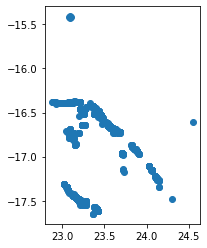

In [59]:
points_deduplicated.plot()

<AxesSubplot:>

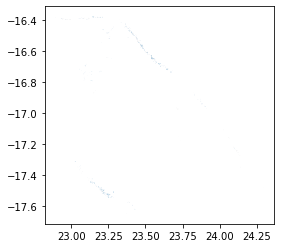

In [60]:
polygons.plot()

#### Left join

In [61]:
left_join = points_deduplicated.sjoin(polygons, how='left', predicate='intersects').reset_index(drop=True)
left_join

,year_left,geometry,type_left,index_right,year_right,type_right
0,2019,POINT (23.87453 -16.92306),point,NaN,NaN,NaN
1,2019,POINT (23.87479 -16.92531),point,909.0,2019.0,polygon
2,2019,POINT (23.87435 -16.92552),point,908.0,2019.0,polygon
3,2019,POINT (23.87408 -16.92484),point,909.0,2019.0,polygon
4,2019,POINT (23.87408 -16.92485),point,909.0,2019.0,polygon
...,...,...,...,...,...,...
2176,2017,POINT (23.44659 -16.53466),point,NaN,NaN,NaN
2177,2017,POINT (23.44676 -16.53464),point,NaN,NaN,NaN
2178,2017,POINT (23.45814 -16.54049),point,182.0,2017.0,polygon
2179,2017,POINT (23.44266 -16.52326),point,174.0,2017.0,polygon


In [62]:
print('There are {} unique points out of {} that do not intersect with a polygon.'.format(left_join['geometry'].nunique() - left_join.dropna()['geometry'].nunique(), left_join['geometry'].nunique()))

There are 1118 unique points out of 2181 that do not intersect with a polygon.


#### Right join

In [63]:
right_join = points_deduplicated.sjoin(polygons, how='right', predicate='intersects').reset_index(drop=True)
right_join

,index_left,year_left,type_left,year_right,geometry,type_right
0,1518.0,2017.0,point,2017,"POLYGON Z ((23.36928 -17.64918 0.00000, 23.369...",polygon
1,NaN,NaN,NaN,2017,"POLYGON Z ((23.36949 -17.64874 0.00000, 23.369...",polygon
2,NaN,NaN,NaN,2017,"POLYGON Z ((23.42761 -17.61737 0.00000, 23.428...",polygon
3,1556.0,2017.0,point,2017,"POLYGON Z ((23.41208 -17.59547 0.00000, 23.412...",polygon
4,1563.0,2017.0,point,2017,"POLYGON Z ((23.41208 -17.59547 0.00000, 23.412...",polygon
...,...,...,...,...,...,...
1504,NaN,NaN,NaN,2020,"POLYGON Z ((22.93479 -16.38802 0.00000, 22.934...",polygon
1505,826.0,2020.0,point,2020,"POLYGON Z ((22.92467 -16.38498 0.00000, 22.925...",polygon
1506,828.0,2020.0,point,2020,"POLYGON Z ((22.89518 -16.38077 0.00000, 22.895...",polygon
1507,829.0,2020.0,point,2020,"POLYGON Z ((22.89518 -16.38077 0.00000, 22.895...",polygon


In [64]:
print('There are {} unique polygons out of {} that do not intersect with a point.'.format(right_join['geometry'].nunique() - right_join.dropna()['geometry'].nunique(), right_join['geometry'].nunique()))

There are 446 unique polygons out of 1153 that do not intersect with a point.


#### Inner join

In [65]:
inner_join = points_deduplicated.sjoin(polygons, how='inner', predicate='intersects').reset_index(drop=True)
inner_join

,year_left,geometry,type_left,index_right,year_right,type_right
0,2019,POINT (23.87479 -16.92531),point,909,2019,polygon
1,2019,POINT (23.87408 -16.92484),point,909,2019,polygon
2,2019,POINT (23.87408 -16.92485),point,909,2019,polygon
3,2019,POINT (23.87435 -16.92552),point,908,2019,polygon
4,2019,POINT (23.33537 -16.41486),point,939,2019,polygon
...,...,...,...,...,...,...
1058,2017,POINT (23.43917 -16.51197),point,155,2017,polygon
1059,2017,POINT (23.44789 -16.53453),point,525,2018,polygon
1060,2017,POINT (23.44125 -16.51562),point,167,2017,polygon
1061,2017,POINT (23.45814 -16.54049),point,182,2017,polygon


In [66]:
print('There are {} unique points that intersect with {} unique polygons.'.format(inner_join['geometry'].nunique(), inner_join['index_right'].nunique()))

There are 1063 unique points that intersect with 707 unique polygons.


### Are there identical points occurring in several years?

In [67]:
points.shape

(2300, 46)

In [68]:
points['geometry'].nunique()

2181

In [69]:
points['x'].nunique()

2170

In [70]:
points['y'].nunique()

2170

In [71]:
points['x_y'] = points.apply(lambda x: str(x['x']) + '_' + str(x['y']), axis=1)

In [72]:
points['x_y'].nunique()

2181

In [73]:
points[points['Year'] == 2017]['x_y'].nunique() \
+ points[points['Year'] == 2018]['x_y'].nunique() \
+ points[points['Year'] == 2019]['x_y'].nunique() \
+ points[points['Year'] == 2020]['x_y'].nunique()

2181

In [74]:
points[['x_y', 'Year']].groupby('x_y').agg('nunique')['Year'].nunique()

1

There are 2181 unique points. Each point appears only in one year and not in several.

### Are there several points describing the same field?

In [75]:
inner_join['geometry'].nunique()

1063

In [76]:
# index points
inner_join['index_left'] = inner_join.index
inner_join['index_left'].nunique()

1063

In [77]:
# index polygons
inner_join['index_right'].nunique()

707

In [78]:
points_per_polygon = inner_join[['index_left', 'index_right']].groupby('index_right').agg('nunique').reset_index()
points_per_polygon = points_per_polygon.rename(columns={'index_right': 'polygon', 'index_left': 'number_of_points'})
points_per_polygon

,polygon,number_of_points
0,0,1
1,3,2
2,4,1
3,5,1
4,6,3
...,...,...
702,1146,1
703,1148,1
704,1150,1
705,1151,2


In [79]:
polygons_with_multiple_points = points_per_polygon[points_per_polygon['number_of_points'] > 1].reset_index(drop=True)
polygons_with_multiple_points

,polygon,number_of_points
0,3,2
1,6,3
2,7,2
3,17,5
4,19,4
...,...,...
168,1106,2
169,1107,5
170,1109,4
171,1142,2


There are 173 polygons intersecting with more than one point. Let's look at an example.

In [80]:
polygons['index'] = polygons.index
polygons_with_multiple_points = pd.merge(polygons_with_multiple_points, polygons, how='inner', left_on='polygon', right_on='index')
polygons_with_multiple_points = gpd.GeoDataFrame(polygons_with_multiple_points, crs='EPSG:4326', geometry=polygons_with_multiple_points['geometry'])
polygons_with_multiple_points

,polygon,number_of_points,year,geometry,type,index
0,3,2,2017,"POLYGON Z ((23.41208 -17.59547 0.00000, 23.412...",polygon,3
1,6,3,2017,"POLYGON Z ((23.41037 -17.59292 0.00000, 23.410...",polygon,6
2,7,2,2017,"POLYGON Z ((23.39374 -17.57740 0.00000, 23.394...",polygon,7
3,17,5,2017,"POLYGON Z ((23.20579 -17.50783 0.00000, 23.206...",polygon,17
4,19,4,2017,"POLYGON Z ((23.21156 -17.50361 0.00000, 23.212...",polygon,19
...,...,...,...,...,...,...
168,1106,2,2020,"POLYGON Z ((23.55741 -16.64845 0.00000, 23.556...",polygon,1106
169,1107,5,2020,"POLYGON Z ((23.54252 -16.64509 0.00000, 23.542...",polygon,1107
170,1109,4,2020,"POLYGON Z ((23.50091 -16.60175 0.00000, 23.500...",polygon,1109
171,1142,2,2020,"POLYGON Z ((22.94552 -16.39111 0.00000, 22.945...",polygon,1142


<AxesSubplot:>

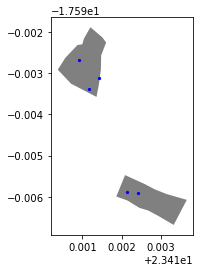

In [81]:
fig, ax = plt.subplots()
polygons_with_multiple_points[:2].plot(ax=ax, facecolor='gray')
inner_join[inner_join['index_right'].isin(polygons_with_multiple_points[:2]['polygon'].to_list())].plot(ax=ax, color='blue', markersize=5)